<a href="https://colab.research.google.com/github/benasphy/Linear-Regression/blob/main/Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
class Linear_Regression_Scratch:
  def __init__(self, learning_rate, n_iters):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self, X, y):
    X = np.array(X)
    y = np.array(y)

    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias

      dw = (2/n_samples) * np.dot(X.T, (y_pred - y))
      db = (2/n_samples) * np.sum(y_pred - y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db

  def predict(self, X):
    X = np.array(X)
    return np.dot(X, self.weights) + self.bias

  def evaluate(self, X, y):
    y_pred = self.predict(X)
    mse = np.mean(y_pred - y) ** 2
    return mse


In [15]:
data = {
    'X': [1, 2, 3, 4, 5],
    'y': [2, 4, 5, 4, 5]
}
df = pd.DataFrame(data)

X = df[["X"]]
y = df["y"]

In [16]:
model = Linear_Regression_Scratch(learning_rate=0.005, n_iters=10000)
model.fit(X, y)

In [17]:
predictions = model.predict(X)
predictions

array([2.79999994, 3.39999996, 3.99999999, 4.60000001, 5.20000003])

In [18]:
mse = model.evaluate(X, y)
print(model.weights)
print(model.bias)
print(mse)

[0.60000002]
2.199999915213037
2.0543705150089633e-16


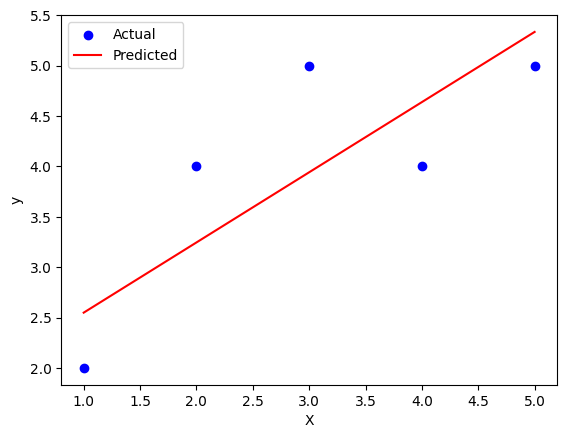

In [13]:
plt.scatter(X, y, color = "blue", label = "Actual")
plt.plot(X, predictions, color = "red", label = "Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()